# **Импорты библиотек**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

# **Загрузка csv файлов**

In [3]:
train_data = pd.read_csv('./train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [4]:
songs_data = pd.read_csv('./songs.csv')
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [5]:
members_data = pd.read_csv('./tables/csv/members.csv')
members_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [6]:
test_data = pd.read_csv('./tables/csv/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [6]:
sample_submission = pd.read_csv('./tables/csv/sample_submission.csv')
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   target  float64
dtypes: float64(1), int64(1)
memory usage: 39.0 MB


In [7]:
song_extra_info_data = pd.read_csv('./tables/csv/song_extra_info.csv')
song_extra_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


# **Данные датасета**

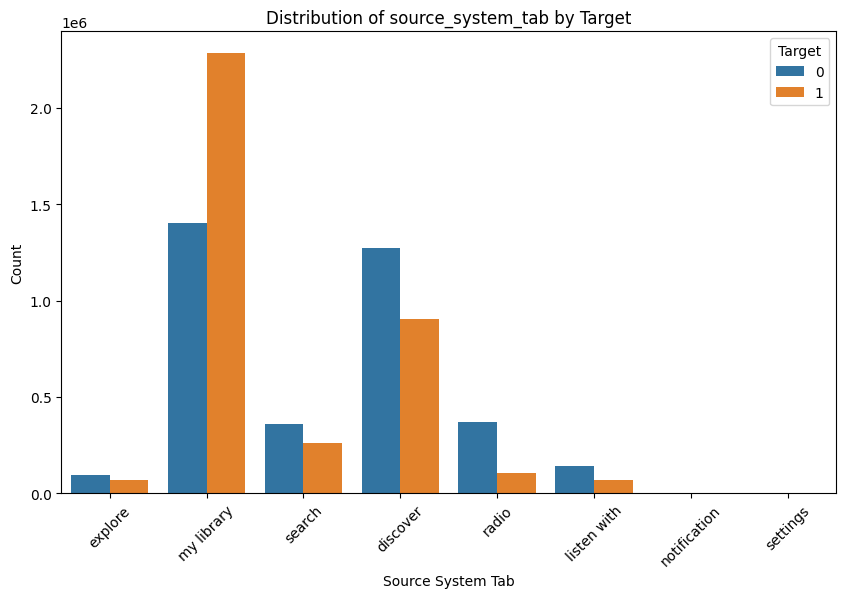

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='source_system_tab', hue='target', data=train_data)
plt.title('Distribution of source_system_tab by Target')
plt.xlabel('Source System Tab')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['0', '1'])
plt.show()

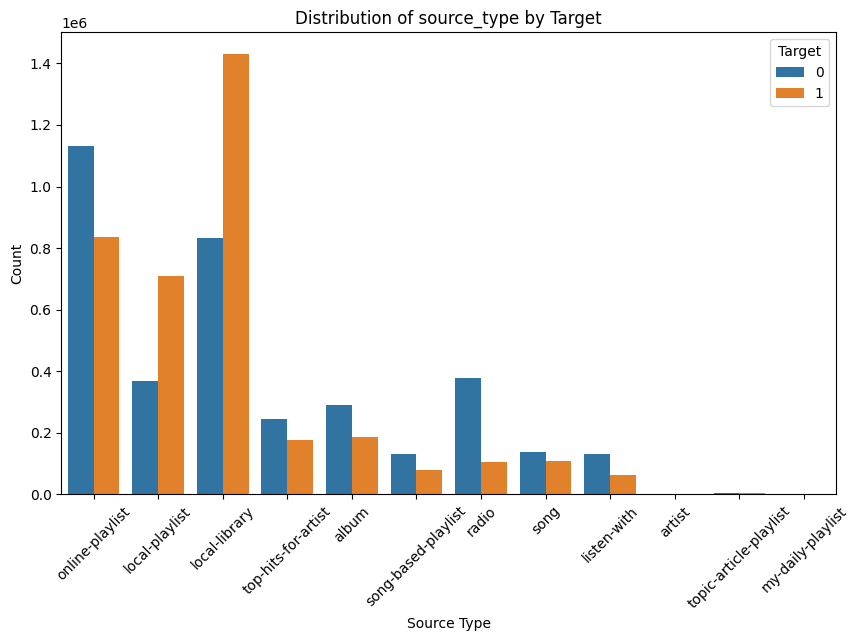

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='source_type', hue='target', data=train_data)
plt.title('Distribution of source_type by Target')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['0', '1'])
plt.show()

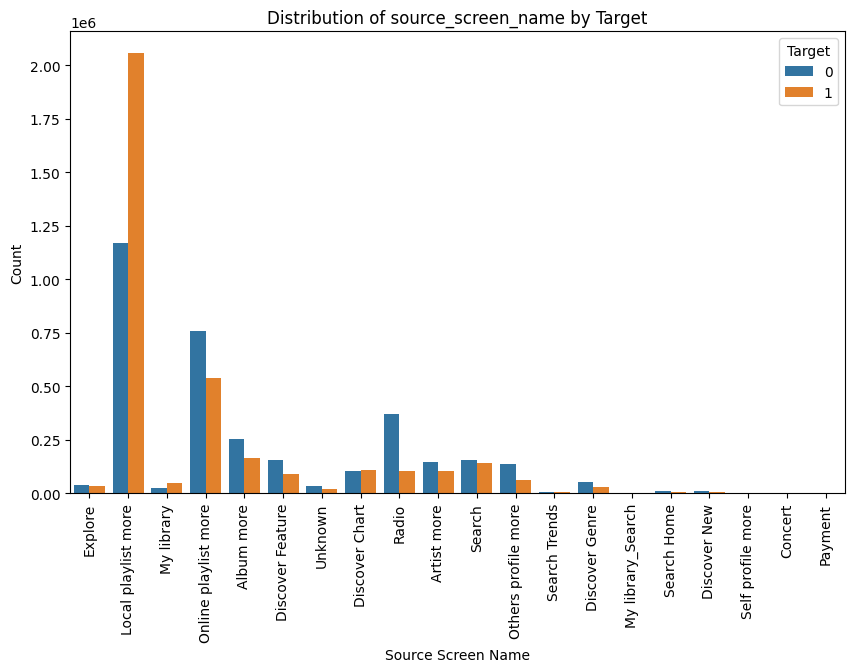

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(x='source_screen_name', hue='target', data=train_data)
plt.title('Distribution of source_screen_name by Target')
plt.xlabel('Source Screen Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Target', labels=['0', '1'])
plt.show()

In [5]:
sample_submission = sample_submission.drop(['target'], axis=1)

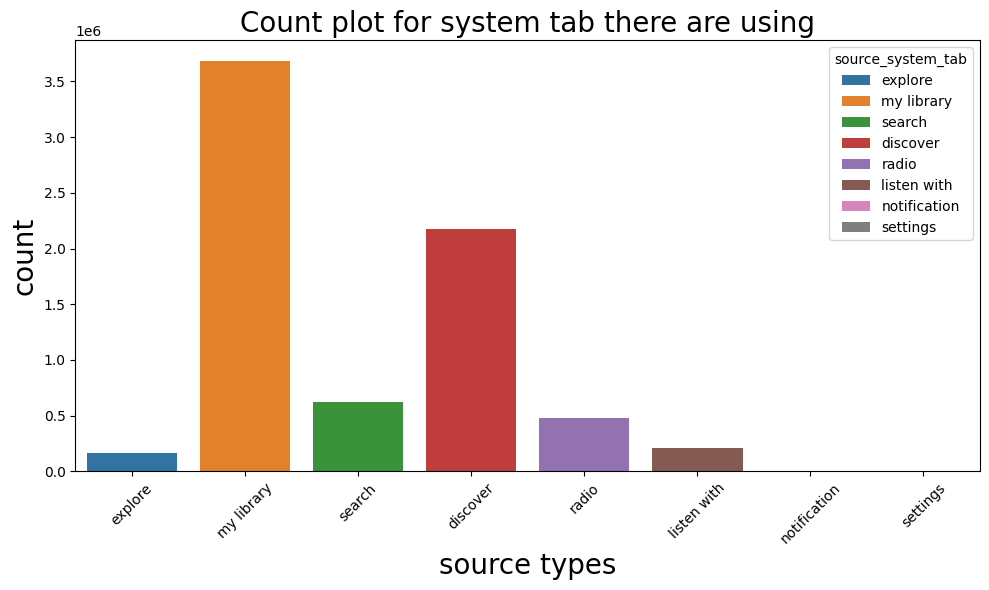

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(x='source_system_tab',hue='source_system_tab', data=train_data)
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation=45)
plt.title('Count plot for system tab there are using',fontsize=20)
plt.tight_layout()

Text(0.5, 0, 'registration time')

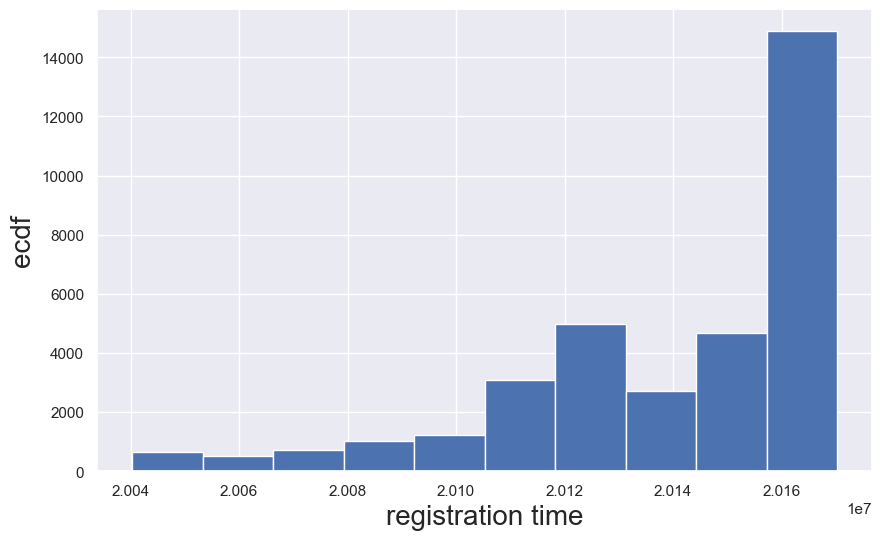

In [22]:
plt.figure(figsize=(10,6))
plt.hist(members_data.registration_init_time)
plt.ylabel('ecdf',fontsize=20)
plt.xlabel('registration time' ,fontsize=20)

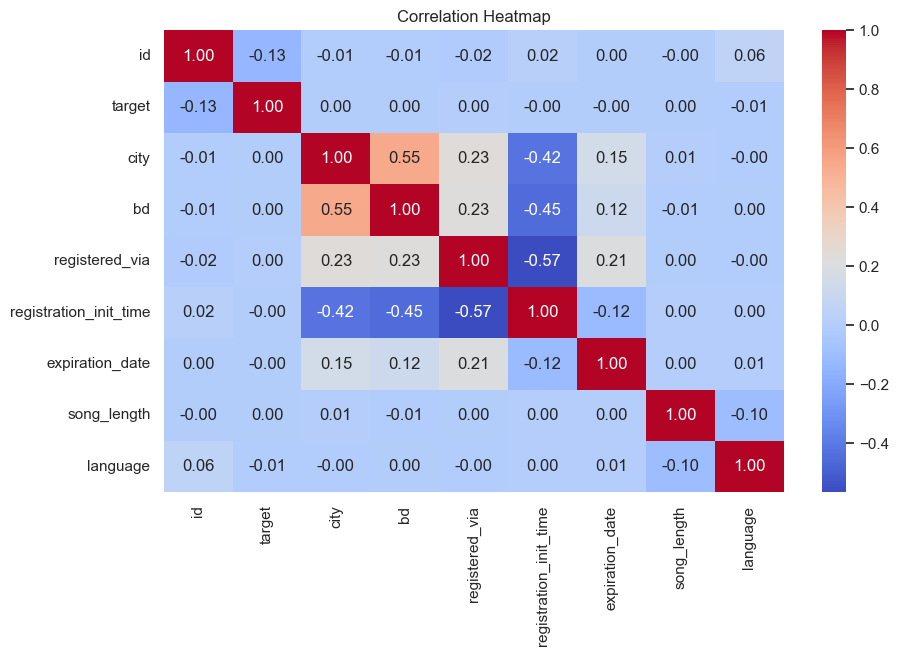

In [12]:
all_data = pd.concat([sample_submission, train_data, song_extra_info_data, members_data, songs_data], axis=1)
all_data = all_data[all_data.select_dtypes(include=['int64', 'float64']).columns]

plt.figure(figsize=(10,6))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
train_members = pd.merge(train_data, members_data, on='msno', how='inner')
train_merged = pd.merge(train_members, songs_data, on='song_id', how='outer')
print(train_merged.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=   
2  xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=   
3  s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=   
4  Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=          discover   
2  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
3  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
4  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   

     source_screen_name      source_type  target  city    bd  gender  \
0               Explore  online-playlist     1.0   1.0   0.0     NaN   
1  Online playlist more  online-playlist     0.0  15.0  18.0    male   
2   Local playlist more    local-library     1.0   1.0   0.0  

<Axes: >

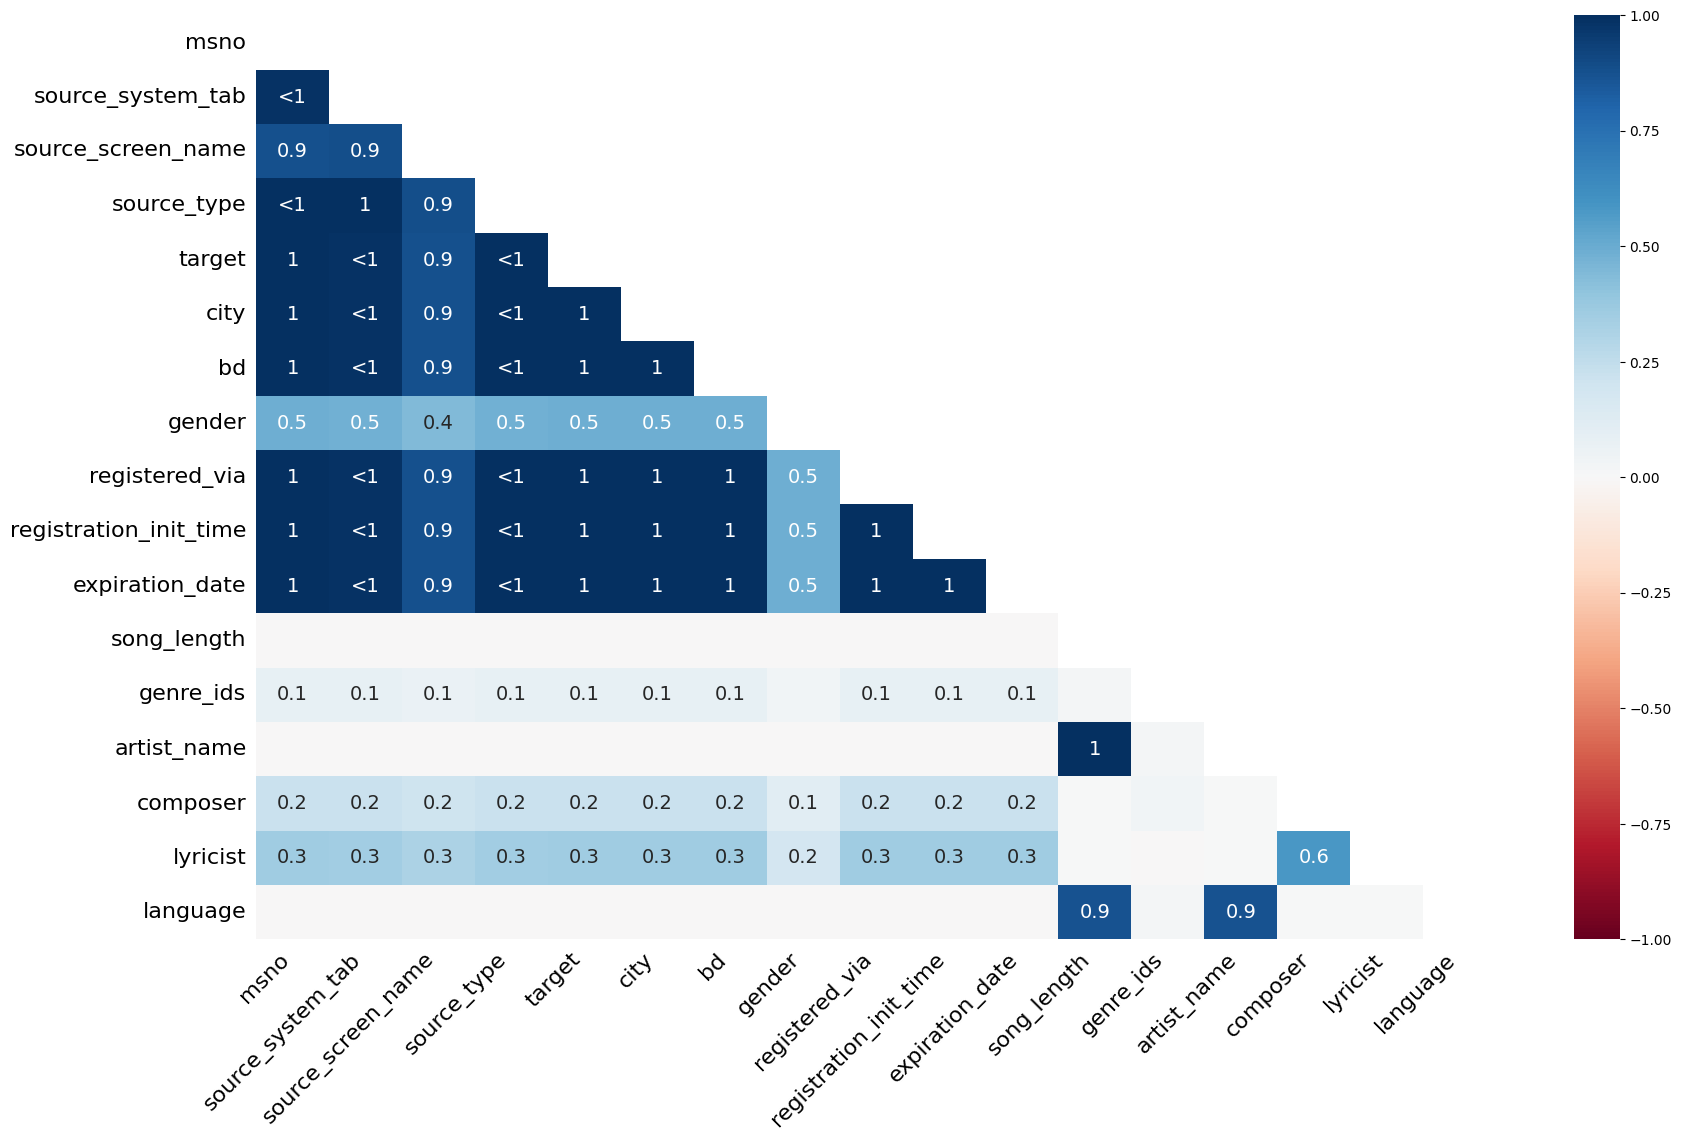

In [ ]:
msno.heatmap(train_merged)

In [16]:
test_members = pd.merge(test_data, members_data, on='msno', how='inner')
test_merged = pd.merge(test_members, songs_data, on='song_id', how='outer')
print(test_merged.head())
print(len(test_merged.columns))

          id                                          msno  \
0        0.0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1  1035059.0  08rvvaaab7dM7h78GC4SphLkUCSXPxpu6sY+k8aLUO4=   
2    89968.0  1NvrMNDUcvfqOIjhim8BgdK23znMzGwAO84W+qKs6dw=   
3   972394.0  GfSXhTVP3oj7h0545L/5xh6jD+7edQ7AH0iprl7dYbc=   
4  2194574.0  HkWEvfQyrb5Lve8X3B7HkCEkDFW8qFy/9kWFb4QbM5k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
2  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
3  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
4  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=          discover   

    source_screen_name          source_type  city    bd  gender  \
0  Local playlist more        local-library   1.0   0.0     NaN   
1  Local playlist more        local-library   5.0  29.0  female   
2  Local pl